# Eigenvalues Experiment

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import numpy as np
from tqdm.auto import tqdm

from src.models import MLP
from src.models import train
from src.utils import init_dataloader
from src.models import get_loss
from src.eigenvalues import HessianEigenvector

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_loader = init_dataloader(
    dataset_name='MNIST',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=True,
    size=64 * (10000 // 64)
)

test_loader = init_dataloader(
    dataset_name='MNIST',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=False,
    size=64 * (10000 // 64)
)

In [4]:
eigenvals = []

for _ in tqdm(range(3), desc='Sample'):
    model = MLP(layers_num=2, hidden=256, input_channels=1, input_sizes=(28, 28), classes=10).to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()

    train(model, criterion, train_loader, optimizer)

    loss = get_loss(model, criterion, train_loader, device=DEVICE)
    eigen = HessianEigenvector(model.parameters(), loss.mean())
    eigenvals.append(HessianEigenvector(model.parameters(), loss.mean()).get(32)[0])

eigenvals = np.array(eigenvals)

Sample:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

Power iter:   0%|          | 0/1000 [00:00<?, ?it/s]

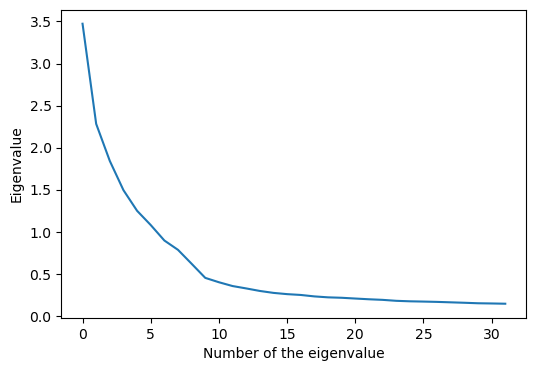

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.plot(eigenvals.mean(axis=0))
plt.xlabel(r"Number of the eigenvalue")
plt.ylabel("Eigenvalue")

plt.savefig(f"../paper/img/eigenvalues.pdf")
plt.show()